# ANN for Predicting Continuous Well Measurements

## 1. Importing Libraries and Loading Data

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
#pandas: handles data tables (like Excel sheets).
#matplotlib.pyplot: helps to make graphs and plots.

med_tutorial_scikit_learn_1.py

# 2. Loading the Dataset

In [84]:
df = pd.read_csv('D:/Last Semester/Student from Algeria/Petrophysics-Python-Series-master/Data/Volve/volve_wells.csv', usecols=['WELL', 'DEPTH', 'RHOB', 'GR', 'NPHI', 'PEF', 'DT'])
#Loads only the selected columns from the CSV file.

In [85]:
df = df.dropna() #Removes any rows that have missing (NaN) values.

### Chooses which wells will be used to train/validate the model and which one will be used as a blind test (unseen data).

In [86]:
df

,DEPTH,DT,GR,NPHI,PEF,RHOB,WELL
69703,2577.0,109.3850,74.6970,0.4030,8.1360,2.3470,15/9-F-11 A
69704,2577.1,110.1320,72.7970,0.3990,7.9250,2.3570,15/9-F-11 A
69705,2577.2,110.8430,71.6290,0.3900,7.7750,2.3600,15/9-F-11 A
69706,2577.3,111.0100,69.8990,0.3850,7.5920,2.3610,15/9-F-11 A
69707,2577.4,110.7970,69.0410,0.3820,7.3800,2.3630,15/9-F-11 A
...,...,...,...,...,...,...,...
149702,3641.7,74.4395,120.4854,0.1973,7.0911,2.6337,15/9-F-1 A
149703,3641.8,74.5584,120.2856,0.1930,7.0064,2.6295,15/9-F-1 A
149704,3641.9,74.6748,119.9561,0.1879,6.8993,2.6240,15/9-F-1 A
149705,3642.0,74.7656,122.5272,0.1825,6.8016,2.6194,15/9-F-1 A


# 3. Splitting Data by Wells

As we are using measurements taken from multiple wells, one way to split our data into training and testing is to set aside a single well (blind test well) which will be used to see how our model performs on unseen data.

In [87]:
# Training Wells
training_wells = ['15/9-F-11 A', '15/9-F-1 A']

# Test Well
test_well = ['15/9-F-1 B']
#Chooses which wells will be used to train/validate the model and which one will be used as a blind test (unseen data).

"Extract" the data from the main dataframe using the well lists above

#  4. Creating Train/Validation and Test Sets

In [88]:
train_val_df = df[df['WELL'].isin(training_wells)].copy() #Extracts data for the selected wells into separate DataFrames.
test_df = df[df['WELL'].isin(test_well)].copy() #copy() ensures we’re not changing the original data.

In [89]:
train_val_df.describe() # Describe Training data

,DEPTH,DT,GR,NPHI,PEF,RHOB
count,21688.000000,21688.000000,21688.000000,21688.000000,21688.000000,21688.000000
mean,3141.098875,77.235857,39.803246,0.166648,7.093603,2.475232
std,314.723749,14.336048,57.907158,0.099200,1.188313,0.147635
min,2577.000000,53.165000,0.852000,0.010000,4.297800,1.980600
25%,2869.475000,66.849300,9.416350,0.096000,6.218475,2.379000
50%,3140.550000,72.720750,27.552000,0.136000,7.487700,2.533000
75%,3411.625000,86.093800,44.877425,0.217200,8.001000,2.581400
max,3723.300000,126.827000,1124.403000,0.593200,13.841000,3.025000


In [90]:
test_df.describe() # Describe testing data

,DEPTH,DT,GR,NPHI,PEF,RHOB
count,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000
mean,3261.550000,84.236378,72.114743,0.204948,6.448994,2.452392
std,94.180262,14.488623,61.620077,0.097875,0.830665,0.133218
min,3098.500000,58.631800,8.001500,0.059500,4.729900,2.111800
25%,3180.025000,74.450700,38.552300,0.146300,5.917400,2.364200
50%,3261.550000,81.407800,50.796200,0.172400,6.345200,2.483300
75%,3343.075000,88.037350,64.980325,0.225450,6.910000,2.539875
max,3424.600000,125.982700,297.767300,0.557600,10.987600,3.051700


# 5. Selecting Training and Target Features

In [91]:
X = train_val_df[['RHOB', 'GR', 'NPHI', 'PEF']] #X: the input features (density, gamma ray, porosity, etc.).
y = train_val_df['DT']  #y: the target (what we want to predict) — here it’s DT (sonic travel time).

Note that the name test used here is commonly used within machine learning. In this case the variables X_test and y_test are our validation data. In other words it is used to help tune our model. 

# 6. Splitting into Training and Validation

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

#### Divides the data:

#####  80% for training

##### 20% for validation (used to tune the model and check performance).

Checking the shapes of X_train and X_test to make sure they have been split correctly.

# 7. Scaling the Data

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#### Standardizes features so each has mean 0 and standard deviation 1.

#### This helps neural networks train faster and more accurately.

In [95]:
X_train = scaler.fit_transform(X_train)

X_train = scaler.fit_transform(X_train)

In [96]:
X_train

array([[ 0.45379311,  0.08996309, -0.07706972,  0.06720101],
       [ 0.34864   , -0.48591286, -0.49858608,  0.39124421],
       [ 0.39952054, -0.45501092, -0.31851107,  0.96732099],
       ...,
       [ 0.37102744, -0.62037074, -0.68167911,  0.78897946],
       [-2.0156089 ,  0.03398644,  1.32127813, -1.58161689],
       [ 0.63696304, -0.51894478, -0.76115355,  0.8823564 ]])

In [97]:
X_val = scaler.transform(X_val)

In [98]:
X_val

array([[ 0.06031696,  0.46609406, -0.60723469, -0.64313666],
       [ 0.77264447, -0.2608964 , -0.61025271,  0.51810224],
       [ 0.67631065, -0.33200038, -0.92110845,  0.16512061],
       ...,
       [-0.48987123, -0.57426725, -0.25110869,  1.06036143],
       [-1.26054175, -0.13147004,  0.45108325, -1.95007722],
       [-1.47966726, -0.24582776,  0.39575294, -1.86174768]])

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

# 8. Building the Neural Network

In [99]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(64,64,64), activation="relu", random_state=42, max_iter=2000)
model.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(64, 64, 64), max_iter=2000, random_state=42)

##### MLPRegressor: a feedforward Artificial Neural Network (ANN).

##### Uses 3 hidden layers, each with 64 neurons.

##### relu activation adds non-linearity.

##### max_iter=2000 allows more training cycles for better convergence.

##### fit() trains the model using the training data.

# 9. Making Predictions

In [100]:
y_pred = model.predict(X_val)

### The trained model predicts DT for the validation dataset.

# 10. Evaluating Model Performance

In [101]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_val, y_pred)

In [102]:
mse = metrics.mean_squared_error(y_val, y_pred)
rmse = mse**0.5 

In [103]:
rmse

3.4394847702585607

In [104]:
r2 = metrics.r2_score(y_val, y_pred)
r2

0.9426513962810797

##### MAE: average absolute error.

##### MSE: average squared error.

##### RMSE: square root of MSE (same units as target).

##### R²: how well predictions match the real data (closer to 1 = better).

# 11. Display Results

In [105]:
print(f"""
MAE: \t{mae:.2f}
RMSE: \t{rmse:.2f}
r2: \t{r2:.2f}
""")
#Nicely formats and prints performance metrics.


MAE: 	2.16
RMSE: 	3.44
r2: 	0.94



Simple metrics like above are a nice way to see how a model has performed, but you should always check the actual data. 

In the plot below, we are comparing the real data against the predicted data.

# 12. Plotting Predicted vs Actual (Validation)

## Test Well Prediction
Once the model has been fine tuned, we can apply it to our blind test well and see how it performs.

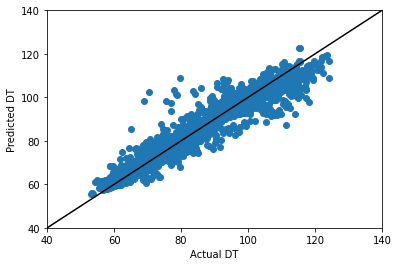

In [106]:
plt.scatter(y_val, y_pred)
plt.xlim(40, 140)
plt.ylim(40, 140)
plt.ylabel('Predicted DT')
plt.xlabel('Actual DT')
plt.plot([40,140], [40,140], 'black')
plt.show()


#####  Compares real and predicted values visually.

#####  The black line shows perfect prediction (1:1).

#####  The closer the points are to the line, the better the model.

# 13. Testing on a Blind Well

In [107]:
test_well_x = test_df[['RHOB', 'GR', 'NPHI', 'PEF']]

In [108]:
test_well_x = scaler.transform(test_well_x)

In [109]:
test_df['TEST_DT'] = model.predict(test_well_x)

##### Prepares and scales features for the test well.

##### Predicts DT values and adds them as a new column.

# 14. Plot Test Well Predictions

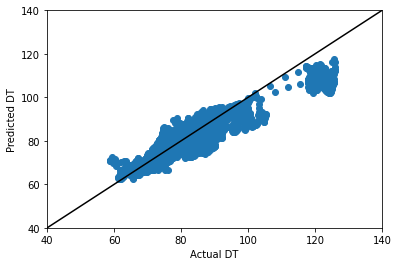

In [110]:
plt.scatter(test_df['DT'], test_df['TEST_DT'])
plt.xlim(40, 140)
plt.ylim(40, 140)
plt.ylabel('Predicted DT')
plt.xlabel('Actual DT')
plt.plot([40,140], [40,140], 'black') #1 to 1 line
plt.show()

#### Same type of plot but for the blind test well — checks generalization.

# 15. Plot Along Depth

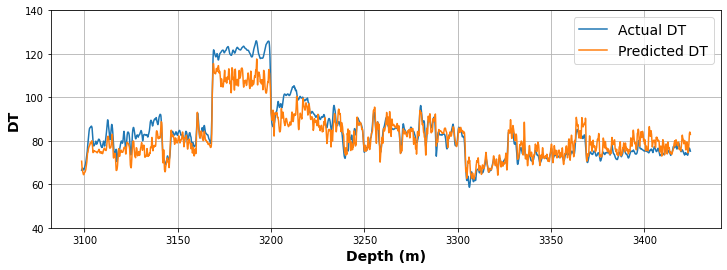

In [112]:
plt.figure(figsize=(12, 4))
plt.plot(test_df['DEPTH'], test_df['DT'], label='Actual DT')
plt.plot(test_df['DEPTH'], test_df['TEST_DT'], label='Predicted DT')

plt.xlabel('Depth (m)', fontsize=14, fontweight='bold')
plt.ylabel('DT', fontsize=14,fontweight='bold')

plt.ylim(40, 140)
plt.legend(fontsize=14)
plt.grid()

Shows how well predictions follow real measurements with depth —
useful for visualizing geological consistency.